# Data analyser Slagayon

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import matplotlib    
# Enable inline plotting
%matplotlib inline

filename = "slagayon.dat"



In [37]:
def load_data(datadir, dataset):
    # RPLidarA1(Laser):
    # 360 degree and 360 measurments (scan_size)

    filename = '%s/%s.dat' % (datadir, dataset)
    print('Loading data from %s...' % filename)

    fd = open(filename, 'rt')

    timestamps = []
    scans = []
    odometries = []

    while True:
        data_string = fd.readline()
        if len(data_string) == 0:
            break

        toks = data_string.split()[0:-1]  # ignore ''
        timestamp = int(toks[0])
        odometry = timestamp, int(toks[1]), int(toks[2])
        #  The scans are saved after odometry: angle:distance
        unormalized_data = toks[3:]
        normalized_data = normalize_rplidar_scan(unormalized_data)
        lidar = [x['distance'] for x in normalized_data]
        timestamps.append(timestamp)
        scans.append(lidar)
        odometries.append(odometry)
    fd.close()
    df = pd.DataFrame(normalized_data)
    
    # delete angle 0
    normalized_data.pop(0)

    return timestamps, scans, odometries, df

In [38]:
def normalize_rplidar_scan(unormalized_data):
    normalized_data = [{'angle': count, 'distance': np.nan} for count in range(361)]
    # RPlidar does not gives always the same amount of scans.
    # Angles may slightly vary
    # This part aims to normalize the data.
    for angle_dist in unormalized_data:
        angle, distance = angle_dist.split(":")
        angle = float(angle)
        distance = float(distance)
        angle = int(angle)
        normalized_data[int(angle)]['distance'] = distance
    return normalized_data

In [39]:
_, lidars, odometries, df = load_data('/tmp', 'slagayon')

Loading data from /tmp/slagayon.dat...


In [40]:
df.head()

angle  distance
0      0   1398.75
1      1   1395.75
2      2   1391.75
3      3   1398.25
4      4   1398.75

In [41]:
df.describe()

angle     distance
count  361.000000   263.000000
mean   180.000000  1231.577947
std    104.355961   916.873728
min      0.000000   205.500000
25%     90.000000   268.000000
50%    180.000000  1267.250000
75%    270.000000  1965.375000
max    360.000000  3157.500000

In [42]:
df.isna().sum()

angle        0
distance    98
dtype: int64

<Figure size 432x288 with 0 Axes>

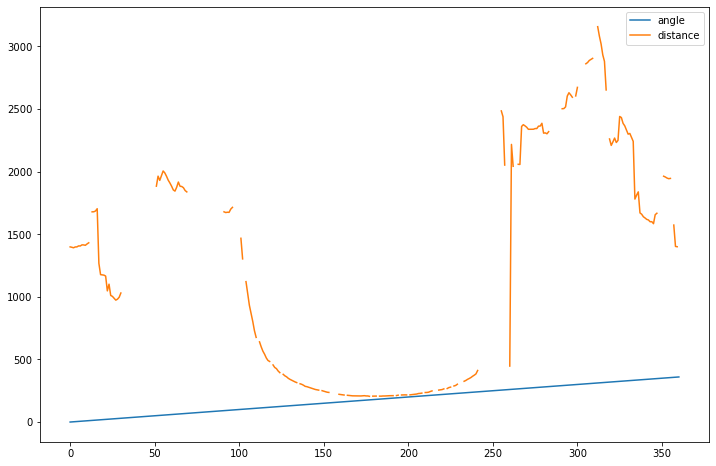

In [43]:
plt.figure()
df.plot(figsize=(12, 8))

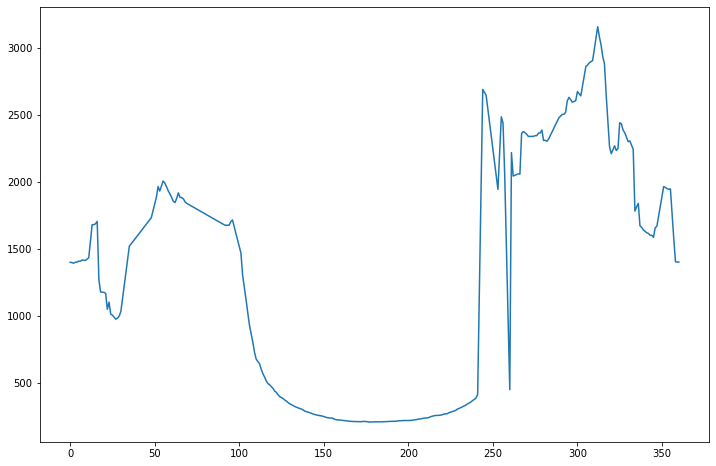

In [44]:
df_lin = df['distance'].interpolate(method='linear')
plt.figure()
df_lin.plot(figsize=(12, 8))

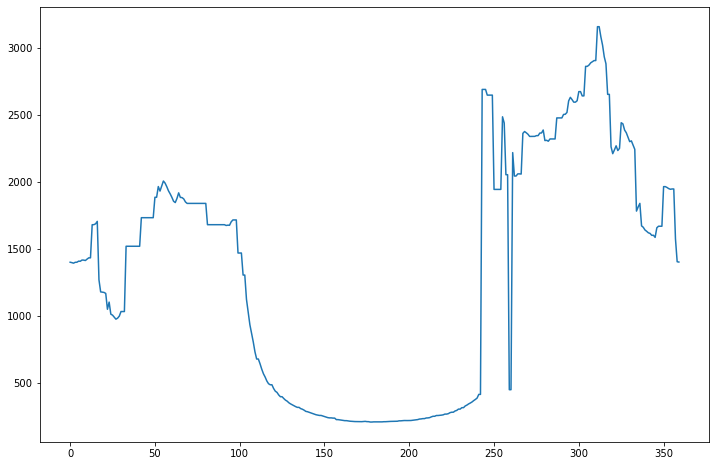

In [45]:
df_near = df['distance'].interpolate(method='nearest')
plt.figure()
df_near.plot(figsize=(12, 8))

In [46]:
df_near.head()


0    1398.75
1    1395.75
2    1391.75
3    1398.25
4    1398.75
Name: distance, dtype: float64

In [47]:
df_lin.head()

0    1398.75
1    1395.75
2    1391.75
3    1398.25
4    1398.75
Name: distance, dtype: float64

In [48]:
df_concat = pd.concat([df_lin, df_near], axis=1, keys=['linear', 'nearest'])
differences = df_concat.diff(axis=1)

In [49]:
differences

linear  nearest
0       NaN    0.000
1       NaN    0.000
2       NaN    0.000
3       NaN    0.000
4       NaN    0.000
..      ...      ...
356     NaN  186.375
357     NaN    0.000
358     NaN    0.000
359     NaN    0.000
360     NaN      NaN

[361 rows x 2 columns]

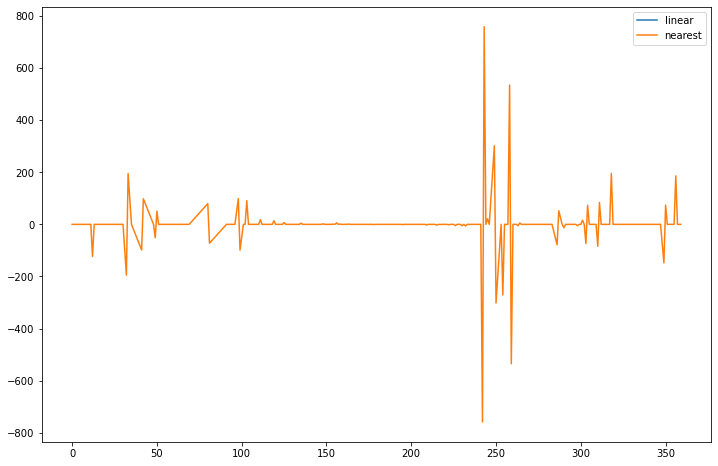

In [53]:
differences.plot(figsize=(12, 8))

In [55]:
df_lin.values.tolist()

[1398.75,
 1395.75,
 1391.75,
 1398.25,
 1398.75,
 1406.75,
 1406.0,
 1415.0,
 1414.5,
 1411.5,
 1422.25,
 1431.5,
 1555.125,
 1678.75,
 1679.25,
 1685.5,
 1703.75,
 1267.25,
 1177.25,
 1175.0,
 1173.25,
 1165.75,
 1047.5,
 1101.0,
 1010.75,
 1003.75,
 988.0,
 973.5,
 981.25,
 996.5,
 1030.5,
 1128.0,
 1225.5,
 1323.0,
 1420.5,
 1518.0,
 1534.4038461538462,
 1550.8076923076924,
 1567.2115384615386,
 1583.6153846153845,
 1600.0192307692307,
 1616.423076923077,
 1632.826923076923,
 1649.2307692307693,
 1665.6346153846155,
 1682.0384615384614,
 1698.4423076923076,
 1714.8461538461538,
 1731.25,
 1782.0833333333333,
 1832.9166666666667,
 1883.75,
 1963.75,
 1930.0,
 1967.0,
 2005.25,
 1989.5,
 1962.75,
 1931.75,
 1909.25,
 1883.5,
 1854.0,
 1844.25,
 1875.0,
 1916.75,
 1882.75,
 1881.25,
 1871.5,
 1849.0,
 1838.0,
 1830.7727272727273,
 1823.5454545454545,
 1816.3181818181818,
 1809.090909090909,
 1801.8636363636363,
 1794.6363636363637,
 1787.409090909091,
 1780.1818181818182,
 1772.954545

In [57]:
df_lin.head(15)

0     1398.750
1     1395.750
2     1391.750
3     1398.250
4     1398.750
5     1406.750
6     1406.000
7     1415.000
8     1414.500
9     1411.500
10    1422.250
11    1431.500
12    1555.125
13    1678.750
14    1679.250
Name: distance, dtype: float64